# Custom Seeds with the WaterShed Algorithm


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Read in the Image and Make a Copy

In [2]:
road = cv2.imread('../DATA/road_image.jpg')
road_copy = road.copy()

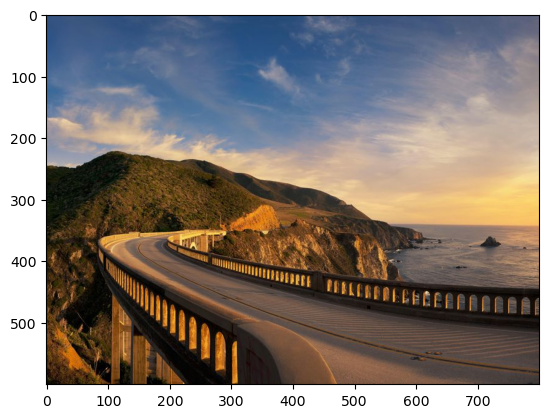

In [5]:
plt.imshow(cv2.cvtColor(road, cv2.COLOR_BGR2RGB));

#### Create an empty space for the results to be drawn

In [7]:
road.shape

(600, 800, 3)

In [8]:
marker_img = np.zeros(road.shape[:2],np.int32)
segments = np.zeros(road.shape, np.uint8)

### Create colors for Markers

https://matplotlib.org/examples/color/colormaps_reference.html

In [9]:
from matplotlib import cm

Returns (R,G,B,Alpha) we only need RGB values

In [10]:
# function to return R,G,B values
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

colors = []

for i in range(10):
    colors.append(create_rgb(i))
    
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

### Setting Up Callback Function

In [11]:
# IMPORTS
import cv2
import numpy as np
from matplotlib import cm

# SETUP

road = cv2.imread('../DATA/road_image.jpg')
road_copy = road.copy()

marker_img = np.zeros(road.shape[:2],np.int32)
segments = np.zeros(road.shape, np.uint8)

def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

colors = []

for i in range(10):
    colors.append(create_rgb(i))

# GLOBAL VARIABLES
current_marker = 1 # COLOR CHOICE
marks_updates = False # MARKERS UPDATED BY WATERSHED
n_markers = 10 # NUM OF MARKERS

# CALLBACK FUNCTION
def mouse_callback(event, x,y, flags, params):
    global marks_updates
    
    if event == cv2.EVENT_LBUTTONDOWN:
        
        cv2.circle(marker_img, (x,y), 10, (current_marker), -1) # MARKERS PASSED TO THE WATERSHED ALGO
        
        cv2.circle(road_copy, (x,y), 10, colors[current_marker], -1) # USER SEES ON THE IMAGE
        
        marks_updates = True

cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)
        
# WHILE TRUE
while True:
    
    cv2.imshow('Watershed Segments', segments)
    cv2.imshow('Road Image', road_copy)
    
    k = cv2.waitKey(1)
    
    # CLOSE ALL WINDOWS
    if k == 27:
        break
    
    # CLEARING ALL THE COLORS PRESS C KEY
    elif k == ord('c'):
        
        road_copy = road.copy()
        marker_img = np.zeros(road.shape[:2], np.int32)
        segments = np.zeros(road.shape, np.uint8)
    
    # UPDATE COLOR CHOICE
    elif k > 0 and chr(k).isdigit(): 
        current_marker = int(chr(k))
        
    # UPDATE THE MARKINGS
    if marks_updates:
        
        marker_img_copy = marker_img.copy()
        cv2.watershed(road,marker_img_copy)
        
        segments = np.zeros(road.shape, np.uint8)
        
        for color_idx in range(n_markers):
            # COLORING SEGMENTS, NUMPY CALL
            segments[marker_img_copy==(color_idx)] = colors[color_idx]

        
cv2.destroyAllWindows()